In [184]:
print('Nama : Muhamad Apriadi')
print('Tugas : Submission Machine Learning Dicoding')
print('email : muhamadapriadi@gmail.com')

Nama : Muhamad Apriadi
Tugas : Submission Machine Learning Dicoding
email : muhamadapriadi@gmail.com


In [152]:

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-05-29 08:54:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.84MB/s    in 80s     

2021-05-29 08:56:01 (3.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [153]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
validation_dir = os.path.join(base_dir, 'rps-cv-images')

In [154]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [155]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')


In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [161]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        subset='training',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [178]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])



In [179]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [181]:
history = model.fit(
      train_generator,
      steps_per_epoch=15,  
      epochs=15,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/15
15/15 - 33s - loss: 0.0958 - accuracy: 0.9708 - val_loss: 0.2094 - val_accuracy: 0.9500
Epoch 2/15
15/15 - 33s - loss: 0.0877 - accuracy: 0.9604 - val_loss: 0.1167 - val_accuracy: 0.9563
Epoch 3/15
15/15 - 33s - loss: 0.0845 - accuracy: 0.9646 - val_loss: 0.2187 - val_accuracy: 0.9563
Epoch 4/15
15/15 - 31s - loss: 0.1144 - accuracy: 0.9556 - val_loss: 0.1492 - val_accuracy: 0.9688
Epoch 5/15
15/15 - 33s - loss: 0.1052 - accuracy: 0.9625 - val_loss: 0.1342 - val_accuracy: 0.9625
Epoch 6/15
15/15 - 33s - loss: 0.1519 - accuracy: 0.9396 - val_loss: 0.1830 - val_accuracy: 0.9250
Epoch 7/15
15/15 - 33s - loss: 0.0985 - accuracy: 0.9667 - val_loss: 0.1480 - val_accuracy: 0.9563
Epoch 8/15
15/15 - 33s - loss: 0.0811 - accuracy: 0.9729 - val_loss: 0.1255 - val_accuracy: 0.9688
Epoch 9/15
15/15 - 31s - loss: 0.0863 - accuracy: 0.9622 - val_loss: 0.0948 - val_accuracy: 0.9688
Epoch 10/15
15/15 - 33s - loss: 0.0893 - accuracy: 0.9708 - val_loss: 0.0757 - val_accuracy: 0.9750
Epoch 11/

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
[[0. 1. 0.]]
0bioBZYFCXqJIulm.png
Rock


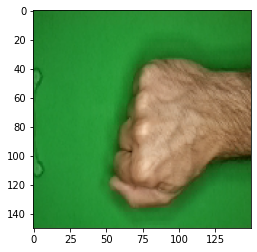

In [183]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')
  else:
    print('Gambar Salah')